# Udacity Nanodegree -  Wrangling and Analyzing 
## WeRateDogs - Twitter
#### Author: Franz Hastrup-Nielsen
#### Date: 10-06-2018

## Introduction

In this project, three different datasets have been utilized for analysis. A given dataset with data from WeRateDogs posts on Twitter, a downloaded dataset using a Twitter API gathering more information on the tweets and a machine learning dataset predicting the content of the attached photos.  
These have been gathered, assessed and cleaned and followed by an analysis and interpretation.

## Gather

In [664]:
import pandas as pd
import requests
import io
import os
import tweepy
import sys
import time
import json
import matplotlib.pyplot as plt 
%matplotlib inline

In [665]:
#Importing the data available in a csv file
df = pd.read_csv('twitter-archive-enhanced.csv')
df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [666]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [667]:
#Using the requests function to download file from HTTP
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
response

<Response [200]>

In [668]:
#Downloaded file is saved
folder_name = 'downloads'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)
    
with open(os.path.join(folder_name,
                     'image_predictions'), mode='wb') as file:
    file.write(response.content)

In [669]:
#The downloaded file is imported
pred = pd.read_csv('downloads\image_predictions',sep='\t')
pred.tail()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


**Explanation of the table above**
- tweet_id is the last part of the tweet URL  
- p1 is the algorithm's #1 prediction for the image in the tweet  
- p1_conf is how confident the algorithm is in its #1 prediction  
- p1_dog is whether or not the #1 prediction is a breed of dog  
- p2 is the algorithm's second most likely prediction  
- p2_conf is how confident the algorithm is in its #2 prediction  
- p2_dog is whether or not the #2 prediction is a breed of dog  

In [670]:
#The below has been commented out as the request only was run once
#consumer_key = ''
#consumer_secret = ''
#access_token = ''
#access_secret = ''

#auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
#auth.set_access_token(access_token, access_secret)

#api = tweepy.API(auth_handler=auth,wait_on_rate_limit=True,wait_on_rate_limit_notify=True)

In [671]:
#https://stackoverflow.com/questions/28218698/how-to-iterate-over-columns-of-pandas-dataframe-to-run-regression
#This has been commented out as the process was a one time processing of requested data
#tweet_list = list(df['tweet_id'])
#rowcount = len(df.index)
#data = {}  
#count=0
#for tweet_id in tweet_list:
#    count = (count + 1)
#    try:
#        tweet = api.get_status(tweet_id,
#                                      wait_on_rate_limit=True, 
#                                      wait_on_rate_limit_notify=True)
#        data[str(tweet_id)] = tweet._json
#        per = count/rowcount*100
#        print("%.2f percent done" % per )
#        
#    except: # catch *all* exceptions
#        print("Error in tweet id: " + str(tweet_id))


In [672]:
#Each tweet's JSON data should be written to its own line. 

#Save file from Twitter API
#with open('tweet_json.txt', 'w') as outfile:  
#    json.dump(data, outfile, 
#              indent=4,
#              sort_keys = True)

In [673]:
#Then read this .txt file line by line into a pandas DataFrame with (at minimum) tweet ID, retweet count, and favorite count.
tweet_df = pd.read_json('tweet_json.txt',orient='index')

In [674]:
tweet_df.head()

,contributors,coordinates,created_at,entities,extended_entities,favorite_count,favorited,geo,id,id_str,...,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,text,truncated,user
1991-02-08 13:48:08.022790149,NaN,NaN,2015-11-15 22:32:08,"{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/BL...,2555,0,NaN,666020888022790144,666020888022790144,...,NaN,NaN,NaN,517,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,0,"{'contributors_enabled': False, 'created_at': ..."
1991-02-08 16:08:05.002620928,NaN,NaN,2015-11-15 23:05:30,"{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/r7...,129,0,NaN,666029285002620928,666029285002620928,...,NaN,NaN,NaN,46,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,0,"{'contributors_enabled': False, 'created_at': ..."
1991-02-08 17:16:52.701032449,NaN,NaN,2015-11-15 23:21:54,"{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/y6...,125,0,NaN,666033412701032448,666033412701032448,...,NaN,NaN,NaN,44,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,0,"{'contributors_enabled': False, 'created_at': ..."
1991-02-08 20:17:06.329800704,NaN,NaN,2015-11-16 00:04:52,"{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/DW...,299,0,NaN,666044226329800704,666044226329800704,...,NaN,NaN,NaN,141,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,0,"{'contributors_enabled': False, 'created_at': ..."
1991-02-08 21:40:48.165822465,NaN,NaN,2015-11-16 00:24:50,"{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/4B...,109,0,NaN,666049248165822464,666049248165822464,...,NaN,NaN,NaN,40,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,0,"{'contributors_enabled': False, 'created_at': ..."


## Assess

3 datasets will be assessed:  
df - given dataset  
pred - Machine Learning predictions of what is in the pictures  
tweet_df - The tweet_id's from df has been used to download the remaining information on these provided tweets  
  
The overall assessment of data can be found in the bottom of this section

### df

In [675]:
df.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
767,777641927919427584,NaN,NaN,2016-09-18 22:54:18 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Arnie. He's a Nova Scot...,7.504293e+17,4.196984e+09,2016-07-05 20:41:01 +0000,https://twitter.com/dog_rates/status/750429297...,12,10,Arnie,None,None,None,None
593,798925684722855936,NaN,NaN,2016-11-16 16:28:21 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Shadow. He's a firm believer that they...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/798925684...,11,10,Shadow,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,None,None,None,None,None
256,843981021012017153,NaN,NaN,2017-03-21 00:22:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...",HE WAS DOING A SNOOZE NO SHAME IN A SNOOZE 13/...,NaN,NaN,NaN,https://twitter.com/brianstack153/status/79679...,13,10,None,None,None,None,None
695,786709082849828864,NaN,NaN,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None


In [749]:
print (" The text: %s \n The grade in rating_numerator: %.1f \n" % (df['text'].ix[695], df['rating_numerator'].ix[695]))

 The text: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS 
 The grade in rating_numerator: 75.0 



Amount of mentions of "doggo", "floofer", "pupper","puppo"

In [677]:
df.doggo.value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [678]:
df.floofer.value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [679]:
df.pupper.value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [680]:
df.puppo.value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

Pupper is by far the most popular

In [681]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

timestamp, retweeted_status_timestamp -> object  
tweet_id could be object instead of integer/float  

In [682]:
df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


rating_numerator has values below 10  
rating_denominator has values different from 10 (range 0-170)

In [683]:
sum(df.duplicated())

0

### pred

In [684]:
pred.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2014,879415818425184262,https://pbs.twimg.com/ext_tw_video_thumb/87941...,1,English_springer,0.383404,True,Boston_bull,0.134967,True,Cardigan,0.110481,True
629,680913438424612864,https://pbs.twimg.com/media/CXMXKKHUMAA1QN3.jpg,1,Pomeranian,0.615678,True,golden_retriever,0.126455,True,Chihuahua,0.087184,True
747,687704180304273409,https://pbs.twimg.com/media/CYs3TKzUAAAF9A2.jpg,1,miniature_pinscher,0.956063,True,toy_terrier,0.012231,True,Chihuahua,0.005397,True
1361,761227390836215808,https://pbs.twimg.com/media/CpBsRleW8AEfO8G.jpg,1,cougar,0.306512,False,French_bulldog,0.280802,True,boxer,0.054523,True
1545,792050063153438720,https://pbs.twimg.com/media/Cv3tU38WcAASFas.jpg,2,komondor,0.942856,True,swab,0.052715,False,Tibetan_terrier,0.002743,True
1313,754747087846248448,https://pbs.twimg.com/media/CnlmeL3WgAA4c84.jpg,1,rotisserie,0.471493,False,cash_machine,0.250837,False,sliding_door,0.117872,False
685,683857920510050305,https://pbs.twimg.com/media/CX2NJmRWYAAxz_5.jpg,1,bluetick,0.174738,True,Shetland_sheepdog,0.126101,True,beagle,0.122887,True
1878,846153765933735936,https://pbs.twimg.com/media/C74kWqoU8AEaf3v.jpg,1,giant_schnauzer,0.346468,True,flat-coated_retriever,0.218451,True,Labrador_retriever,0.108020,True
1506,785533386513321988,https://pbs.twimg.com/media/CubGchjXEAA6gpw.jpg,2,miniature_pinscher,0.436023,True,black-and-tan_coonhound,0.258049,True,Rottweiler,0.145231,True
787,690374419777196032,https://pbs.twimg.com/media/CZSz3vWXEAACElU.jpg,1,kuvasz,0.286345,True,Labrador_retriever,0.107144,True,ice_bear,0.085086,False


How many dogs are present in the dataset and the different predictions?

In [685]:
pred.p1_dog.value_counts()

True     1532
False     543
Name: p1_dog, dtype: int64

In [686]:
pred.p2_dog.value_counts()

True     1553
False     522
Name: p2_dog, dtype: int64

In [687]:
pred.p3_dog.value_counts()

True     1499
False     576
Name: p3_dog, dtype: int64

The machine learning algorithm seems to guess in different categories, as all three guesses are not necessarily dogs

In [688]:
pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


tweet_id converted to object  

In [689]:
pred.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [690]:
sum(pred.duplicated())

0

### tweet_df

In [691]:
#https://stackoverflow.com/questions/11285613/selecting-columns-in-a-pandas-dataframe?utm_medium=organic&utm_source=google_rich_qa&utm_campaign=google_rich_qa
#Splitting up the tweet_df to show all columns here
tweet_df.iloc[:,1:15].sample(5)

,coordinates,created_at,entities,extended_entities,favorite_count,favorited,geo,id,id_str,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str
1991-07-21 00:17:35.951884288,NaN,2015-12-24 16:00:30,"{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/MQ...,17839,0,NaN,680055455951884288,680055455951884288,None,NaN,NaN,NaN,NaN
1994-11-24 01:15:53.186217984,NaN,2016-10-11 00:34:48,"{'hashtags': [], 'symbols': [], 'urls': [{'dis...",NaN,8532,0,NaN,785639753186217984,785639753186217984,None,NaN,NaN,NaN,NaN
1995-12-01 00:28:06.764523521,NaN,2017-01-07 16:59:28,"{'hashtags': [], 'symbols': [], 'urls': [{'dis...",NaN,11613,0,NaN,817777686764523520,817777686764523520,None,NaN,NaN,NaN,NaN
1996-08-05 10:11:11.831150596,NaN,2017-03-07 22:22:32,"{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/JE...,29010,0,NaN,839239871831150592,839239871831150592,None,NaN,NaN,NaN,NaN
1997-06-03 17:36:33.868664832,NaN,2017-05-19 00:12:11,"{'hashtags': [], 'symbols': [], 'urls': [{'dis...",NaN,26955,0,NaN,865359393868664832,865359393868664832,None,NaN,NaN,NaN,NaN


In [692]:
tweet_df.iloc[:,15:].sample(5)

,is_quote_status,lang,place,possibly_sensitive,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,text,truncated,user
1994-04-19 00:22:01.925144576,0,en,None,NaN,NaN,NaN,NaN,NaN,427,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",His name is Charley and he already has a new s...,0,"{'contributors_enabled': False, 'created_at': ..."
1991-03-13 19:27:54.547511297,0,en,None,0.0,0.0,NaN,NaN,NaN,160,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Ruffles. He is an Albanian Shoop Da Wh...,0,"{'contributors_enabled': False, 'created_at': ..."
1991-05-08 15:17:41.853720576,0,en,None,0.0,0.0,NaN,NaN,NaN,2228,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is a heavily opinionated dog. Loves walls...,0,"{'contributors_enabled': False, 'created_at': ..."
1995-10-07 20:16:24.823349248,0,en,None,0.0,0.0,NaN,NaN,NaN,4064,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Rocky. He got triple-doggo-dared. Stuc...,0,"{'contributors_enabled': False, 'created_at': ..."
1991-02-13 07:38:44.426358785,0,en,None,0.0,0.0,NaN,NaN,NaN,199,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",Oh boy what a pup! Sunglasses take this one to...,0,"{'contributors_enabled': False, 'created_at': ..."


In [693]:
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2344 entries, 1991-02-08 13:48:08.022790149 to 1998-04-12 22:37:23.555336193
Data columns (total 30 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2344 non-null datetime64[ns]
entities                         2344 non-null object
extended_entities                1823 non-null object
favorite_count                   2344 non-null int64
favorited                        2344 non-null int64
geo                              0 non-null float64
id                               2344 non-null int64
id_str                           2344 non-null int64
in_reply_to_screen_name          78 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null float64
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 non-null float64
is_quote_status                  23

In [694]:
tweet_df.describe()

,contributors,coordinates,favorite_count,favorited,geo,id,id_str,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,is_quote_status,possibly_sensitive,possibly_sensitive_appealable,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,truncated
count,0.0,0.0,2344.000000,2344.0,0.0,2.344000e+03,2.344000e+03,7.800000e+01,7.800000e+01,7.800000e+01,7.800000e+01,2344.000000,2206.0,2206.0,2.600000e+01,2.600000e+01,2344.000000,2344.0,2344.000000
mean,NaN,NaN,8064.628840,0.0,NaN,7.423239e+17,7.423239e+17,7.455079e+17,7.455079e+17,2.014171e+16,2.014171e+16,0.013225,0.0,0.0,8.176271e+17,8.176271e+17,3023.098976,0.0,0.105375
std,NaN,NaN,12131.346752,0.0,NaN,6.833568e+16,6.833568e+16,7.582492e+16,7.582492e+16,1.252797e+17,1.252797e+17,0.114262,0.0,0.0,5.628443e+16,5.628443e+16,5027.517669,0.0,0.307102
min,NaN,NaN,0.000000,0.0,NaN,6.660209e+17,6.660209e+17,6.658147e+17,6.658147e+17,1.185634e+07,1.185634e+07,0.000000,0.0,0.0,7.061659e+17,7.061659e+17,0.000000,0.0,0.000000
25%,NaN,NaN,1407.000000,0.0,NaN,6.783868e+17,6.783868e+17,6.757419e+17,6.757419e+17,3.086374e+08,3.086374e+08,0.000000,0.0,0.0,7.906447e+17,7.906447e+17,607.000000,0.0,0.000000
50%,NaN,NaN,3536.500000,0.0,NaN,7.189556e+17,7.189556e+17,7.038708e+17,7.038708e+17,4.196984e+09,4.196984e+09,0.000000,0.0,0.0,8.331775e+17,8.331775e+17,1411.500000,0.0,0.000000
75%,NaN,NaN,9967.500000,0.0,NaN,7.986989e+17,7.986989e+17,8.257804e+17,8.257804e+17,4.196984e+09,4.196984e+09,0.000000,0.0,0.0,8.637581e+17,8.637581e+17,3519.250000,0.0,0.000000
max,NaN,NaN,143275.000000,0.0,NaN,8.924206e+17,8.924206e+17,8.862664e+17,8.862664e+17,8.405479e+17,8.405479e+17,1.000000,0.0,0.0,8.860534e+17,8.860534e+17,77286.000000,0.0,1.000000


### Quality
#### 'df' table  
- There is HTML code in the **source** column. The HTML code should be removed if the source needs to be interpreted    
- Not all URLs in the **source** column are refering to twitter. There are examples of gofundme and vin.co references. 
- The column **rating_numerator** has values below 10 which is not adhering to the general idea. It should be 10 or above.  
- The **rating_denominator** has values different from 10, with a range between 0-170. Generally the idea is that this should be 10    
- Index 1002 has the dog name set to **a** and the numerator to **8**. The name does not seem realistic and the numerator is supposed to be 10    
- The **name** column is in several instances missing a dog name
- Some fields within the **expanded_urls** seems to be missing 
- The algorithm to extract grades into the **rating_numerator** column seems to be wrong
- Retweets will be removed otherwise tweets will be present several times in the dataset. The column **retweeted_status_id** will be used to identify these  
- All replies to tweets will also be removed otherwise data will be present several times. The column **in_reply_to_status_id** will be used to identify these

#### 'pred' table
None found  

#### 'tweet_df' table
- There is HTML code in the **source** column. The HTML code should be removed if the source needs to be interpreted 
- The columns **contributors**, **coordinates** and **geo** have zero entries  
- The column **place** has 1 entry   


### Tidiness  
#### 'df' table  
- The columns **in_reply_to_status_id**, **retweet_status_id**, **retweeted_status_user_id** all seems to be represented in scientific notation as the type is float64. If used they could be converted to int64.  
- The dog rating is included in both the **text** and **rating_numerator** columns  
- The columns **timestamp**, **retweeted_status_timestamp** are both objects and should be converted to datetime if needed for analysis   
- The columns **doggo**, **floofer**, **pupper** and **puppo** will be merged into one column  

#### 'pred' table
None found

#### 'tweet_df' table
- The column with tweet id is named **id** and should be renamed to **tweet_id**    
- The first column has been read wrong
- Another index should be used    
- The columns **id** and **id_str** are similar  
- Drop some columns as per project description  
- The columns **in_reply_to_status_id**, **in_reply_to_status_id_str**, **quoted_status_id**, **quoted_status_str** are all float64 and should be converted to int64

## Clean

In [695]:
#Copying the datasets for cleaning purposes
df_clean = df.copy()
pred_clean = pred.copy()
tweet_df_clean = tweet_df.copy()

## df

### Algorithm to extract grades into the **rating_numerator** in df seems to be wrong  
#### Define  
The algorithm that extracts the dog grades in the provided dataset "twitter-archive-enhanced.csv" seems to be wrongly interpreting the grades given. The column rating_numerator will be overwritten with a new algorithm, extracting the grade from the tweet text. Two code approaches will be tested

#### Code 1

In [696]:
#Extracting the rating numerator from the text column - only extracting values with a "."
df_clean['rating_numerator']=df.text.str.extract('(\d+\.\d+)', expand=True)
df_clean['rating_numerator']= pd.to_numeric(df_clean['rating_numerator'])
print (" The text: %s \n The new grade in rating_numerator: %.1f \n The old grade: %.1f" % (df_clean['text'].ix[2326], df_clean['rating_numerator'].ix[2326],df['rating_numerator'].ix[2326]))
print (" The text: %s \n The new grade in rating_numerator: %.1f \n The old grade: %.1f" % (df_clean['text'].ix[1689], df_clean['rating_numerator'].ix[1689],df['rating_numerator'].ix[1689]))

 The text: This is quite the dog. Gets really excited when not in water. Not very soft tho. Bad at fetch. Can't do tricks. 2/10 https://t.co/aMCTNWO94t 
 The new grade in rating_numerator: nan 
 The old grade: 2.0
 The text: I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace 
 The new grade in rating_numerator: 9.5 
 The old grade: 5.0


C:\Users\franz\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


#### Code 2

In [697]:
#Extracting the rating numerator from the text column - only extracting integers
df_clean['rating_numerator'] = df.text.str.extract('(\d+)', expand=True)
df_clean['rating_numerator'] = pd.to_numeric(df_clean['rating_numerator'])
print (" The text: %s \n The new grade in rating_numerator: %.1f \n The old grade: %.1f" % (df_clean['text'].ix[2326], df_clean['rating_numerator'].ix[2326],df['rating_numerator'].ix[2326]))
print (" The text: %s \n The new grade in rating_numerator: %.1f \n The old grade: %.1f" % (df_clean['text'].ix[1689], df_clean['rating_numerator'].ix[1689],df['rating_numerator'].ix[1689]))

 The text: This is quite the dog. Gets really excited when not in water. Not very soft tho. Bad at fetch. Can't do tricks. 2/10 https://t.co/aMCTNWO94t 
 The new grade in rating_numerator: 2.0 
 The old grade: 2.0
 The text: I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace 
 The new grade in rating_numerator: 9.0 
 The old grade: 5.0


C:\Users\franz\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


#### Test

From the codes above and the testing included as well, code 2 will be used going forward. Code 1 tries to include the full number e.g. "9.5" whereas code 2 just reads the number "9". Code 1 does not work when the number is not having a "." which disqualifies it from being used. The lower resolution of the values in code 2 will be utilized instead. Code 2 is used going forward.

In [698]:
df_test = df_clean.loc[df_clean['rating_numerator'] > 10]
df_test[['text','rating_numerator']].head()

,text,rating_numerator
0,This is Phineas. He's a mystical boy. Only eve...,13
1,This is Tilly. She's just checking pup on you....,13
2,This is Archie. He is a rare Norwegian Pouncin...,12
3,This is Darla. She commenced a snooze mid meal...,13
4,This is Franklin. He would like you to stop ca...,12


In [699]:
df_clean['rating_numerator'].value_counts()

12      545
10      447
11      444
13      343
9       152
8       105
7        51
14       50
6        35
5        34
3        28
2        27
4        24
1        14
0         7
2016      2
420       2
100       2
98        2
50        2
80        2
2015      2
15        2
17        2
31        2
61        1
46        1
44        1
24        1
22        1
20        1
97        1
60        1
121       1
143       1
165       1
987       1
1949      1
47        1
84        1
45        1
2002      1
88        1
92        1
33        1
144       1
2195      1
150       1
182       1
204       1
236       1
2003      1
960       1
1776      1
400       1
Name: rating_numerator, dtype: int64

There is some problems with tweets containing other numbers than the rating itsels. E.g. index 78 writing "@rachel2195". All ratings above 20 will be removed, as it is relatively few and most likely will remove most of the errors in reading the grade.

In [700]:
df_clean.drop(df_clean[(df_clean.rating_numerator > 20)].index,inplace=True);

In [701]:
df_clean['rating_numerator'].value_counts()

12    545
10    447
11    444
13    343
9     152
8     105
7      51
14     50
6      35
5      34
3      28
2      27
4      24
1      14
0       7
17      2
15      2
20      1
Name: rating_numerator, dtype: int64

The final test is the row located in the assess section

In [751]:
print (" The text: %s \n The grade in rating_numerator: %.1f \n" % (df_clean['text'].ix[695], df_clean['rating_numerator'].ix[695]))

 The text: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS 
 The grade in rating_numerator: 9.0 



Reading 9.75 as 9 is indeed better than the original algoritm that extracted 75 as the numerator.

### Rating_denominator in df has values different from 10 (range 0-170)  
#### Define  
The purpose of the tweets are to rate your dog on a scale from 1-10 (however most persons rate above 10). This means that the denominator should always be 10. The tweets with another denominator than 10 will be removed.  
#### Code

In [703]:
df_clean.rating_denominator.value_counts()

10    2302
11       3
20       2
15       1
90       1
16       1
2        1
Name: rating_denominator, dtype: int64

In [704]:
#https://stackoverflow.com/questions/13851535/how-to-delete-rows-from-a-pandas-dataframe-based-on-a-conditional-expression
df_clean.drop(df_clean[(df_clean.rating_denominator != 10)].index,inplace=True);

#### Test

In [705]:
df_clean.rating_denominator.value_counts()

10    2302
Name: rating_denominator, dtype: int64

### Timestamp in df needs to be converted from object to datetime  
#### Define  
The timestamp should be in datetime format and not object  

#### Code

In [706]:
df_clean['timestamp'] = pd.to_datetime(df_clean['timestamp'],format='%Y-%m-%d %H:%M:%S')

#### Test 

In [707]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2302 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2302 non-null int64
in_reply_to_status_id         69 non-null float64
in_reply_to_user_id           69 non-null float64
timestamp                     2302 non-null datetime64[ns]
source                        2302 non-null object
text                          2302 non-null object
retweeted_status_id           176 non-null float64
retweeted_status_user_id      176 non-null float64
retweeted_status_timestamp    176 non-null object
expanded_urls                 2250 non-null object
rating_numerator              2302 non-null int64
rating_denominator            2302 non-null int64
name                          2302 non-null object
doggo                         2302 non-null object
floofer                       2302 non-null object
pupper                        2302 non-null object
puppo                         2302 non-null object
dtypes: datetime64[ns](1

In [708]:
df_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


### Merging dog nicknames into one column
#### Define  
The columns **doggo**, **floofer**, **pupper** and **puppo** will be merged into one column  

#### Code

In [709]:
df_clean['dog_nick'] = df_clean[['doggo','floofer','pupper','puppo']].mask(df_clean[['doggo','floofer','pupper','puppo']].eq('None')).fillna('').sum(axis=1)

#### Test

In [710]:
#Before merging
df_clean['doggo'].value_counts(),df_clean['floofer'].value_counts(),df_clean['pupper'].value_counts(),df_clean['puppo'].value_counts()

(None     2205
 doggo      97
 Name: doggo, dtype: int64, None       2292
 floofer      10
 Name: floofer, dtype: int64, None      2049
 pupper     253
 Name: pupper, dtype: int64, None     2272
 puppo      30
 Name: puppo, dtype: int64)

In [711]:
#After merging
df_clean['dog_nick'].value_counts()

                1926
pupper           241
doggo             83
puppo             29
doggopupper       12
floofer            9
doggofloofer       1
doggopuppo         1
Name: dog_nick, dtype: int64

The rows where more than one nickname is present is now containing both of these names e.g. "doggopupper"

### Removing unnecessary columns and rows in df  
#### Define  
Several columns in df will not be utilized for data analysis - especially the ones with a lot of text. The following columns will be removed:  
- The columns with dog nicknames as they have been merged into a single column
- expanded_urls: Not relevant for the analysis  
- source: Lot of text and the url's to other sites is due to referencing to a movie uploaded on another media, e.g.  
- name: The most prevalent dog name in the dataset is "None" and the next most is "a". This column will be removed  

In [712]:
df_clean['name'].value_counts()

None         715
a             54
Charlie       12
Cooper        11
Oliver        11
Lucy          11
Penny         10
Lola          10
Bo             9
Winston        9
Tucker         9
the            8
Sadie          8
Daisy          7
Bailey         7
Toby           7
Buddy          7
Koda           6
Milo           6
an             6
Scout          6
Jax            6
Jack           6
Stanley        6
Rusty          6
Oscar          6
Dave           6
Leo            6
George         5
Bentley        5
            ... 
Acro           1
Chevy          1
Hanz           1
Suki           1
Monty          1
Walker         1
Mookie         1
Beemo          1
Spark          1
Pip            1
Ambrose        1
Noosh          1
Tupawc         1
Sam            1
Rumble         1
Tess           1
Nigel          1
Amélie         1
Rilo           1
Flurpson       1
DonDon         1
Stu            1
Kulet          1
Zeus           1
Schnitzel      1
Rufio          1
Gunner         1
Tanner        

Some rows will also be removed as they represent responses or retweets of the same material already present in the dataset. This includes all rows with values in **retweeted_status_id** and **in_reply_to_status_id**. Here after will these two columns also be removed as they will not be containing any values.

#### Code for row removal

In [713]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2302 entries, 0 to 2355
Data columns (total 18 columns):
tweet_id                      2302 non-null int64
in_reply_to_status_id         69 non-null float64
in_reply_to_user_id           69 non-null float64
timestamp                     2302 non-null datetime64[ns]
source                        2302 non-null object
text                          2302 non-null object
retweeted_status_id           176 non-null float64
retweeted_status_user_id      176 non-null float64
retweeted_status_timestamp    176 non-null object
expanded_urls                 2250 non-null object
rating_numerator              2302 non-null int64
rating_denominator            2302 non-null int64
name                          2302 non-null object
doggo                         2302 non-null object
floofer                       2302 non-null object
pupper                        2302 non-null object
puppo                         2302 non-null object
dog_nick                

In [714]:
df_clean = df_clean[df_clean['retweeted_status_id'].isnull()]
df_clean = df_clean[df_clean['in_reply_to_status_id'].isnull()]

#### Test of removed rows

In [715]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2057 entries, 0 to 2355
Data columns (total 18 columns):
tweet_id                      2057 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2057 non-null datetime64[ns]
source                        2057 non-null object
text                          2057 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2054 non-null object
rating_numerator              2057 non-null int64
rating_denominator            2057 non-null int64
name                          2057 non-null object
doggo                         2057 non-null object
floofer                       2057 non-null object
pupper                        2057 non-null object
puppo                         2057 non-null object
dog_nick                      20

#### Code for column removal

In [716]:
df_clean.drop(['doggo','floofer','pupper','puppo','expanded_urls', 'source','name','in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id',
               'retweeted_status_user_id','retweeted_status_timestamp'], axis=1,inplace=True)


#### Test of remaining columns

In [717]:
df_clean.sample(10)

,tweet_id,timestamp,text,rating_numerator,rating_denominator,dog_nick
283,838952994649550848,2017-03-07 03:22:35,SHE MISPLACED HER HOOMAN 13/10 MISTAKES HAPPEN...,13,10,
163,860276583193509888,2017-05-04 23:34:55,This is Jordy. He likes to go on adventures an...,12,10,
1631,684481074559381504,2016-01-05 21:06:19,Meet Pippa. She's an Elfin High Feta. Compact ...,10,10,
1387,700505138482569216,2016-02-19 02:20:14,This is Kaia. She's just cute as hell. 12/10 I...,12,10,
1429,697596423848730625,2016-02-11 01:42:02,Here's a pupper with a piece of pizza. Two of ...,11,10,pupper
1046,743545585370791937,2016-06-16 20:47:36,Say hello to Bentley and Millie. They do every...,11,10,
1041,743980027717509120,2016-06-18 01:33:55,This is Geno. He's a Wrinkled Baklavian Velvee...,11,10,
1030,745433870967832576,2016-06-22 01:50:58,This is Lenox. She's in a wheelbarrow. Silly d...,10,10,doggo
1820,676588346097852417,2015-12-15 02:23:26,This is Bubbles. He kinda resembles a fish. Al...,5,10,
1495,692535307825213440,2016-01-28 02:30:58,This is Amber. She's a Fetty Woof. 10/10 would...,10,10,


In [718]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2057 entries, 0 to 2355
Data columns (total 6 columns):
tweet_id              2057 non-null int64
timestamp             2057 non-null datetime64[ns]
text                  2057 non-null object
rating_numerator      2057 non-null int64
rating_denominator    2057 non-null int64
dog_nick              2057 non-null object
dtypes: datetime64[ns](1), int64(3), object(2)
memory usage: 112.5+ KB


## pred
### Remove columns not necessary for data analysis  
#### Define  
**img_num** in the pred table will be removed. **img_num** is the image number and has not been found relevant for analysis.  
#### Code

In [719]:
pred_clean.drop(['jpg_url','img_num'], axis=1,inplace=True);

#### Test

In [720]:
pred_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 10 columns):
tweet_id    2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(3)
memory usage: 119.6+ KB


## tweet_df
### Wrong index in 'tweet_df' table

#### Define

The index used in the tweet_df table is the tweet_id somehow converted into a datetime format. This should be removed and a normal index inserted instead

#### Code

In [721]:
tweet_df_clean.reset_index(inplace=True)
tweet_df_clean.drop('index', axis=1, inplace=True)
#tweet_df_clean.drop('level_0', axis=1, inplace=True)

#### Test

In [722]:
tweet_df_clean.head()

,contributors,coordinates,created_at,entities,extended_entities,favorite_count,favorited,geo,id,id_str,...,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,text,truncated,user
0,NaN,NaN,2015-11-15 22:32:08,"{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/BL...,2555,0,NaN,666020888022790144,666020888022790144,...,NaN,NaN,NaN,517,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,0,"{'contributors_enabled': False, 'created_at': ..."
1,NaN,NaN,2015-11-15 23:05:30,"{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/r7...,129,0,NaN,666029285002620928,666029285002620928,...,NaN,NaN,NaN,46,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,0,"{'contributors_enabled': False, 'created_at': ..."
2,NaN,NaN,2015-11-15 23:21:54,"{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/y6...,125,0,NaN,666033412701032448,666033412701032448,...,NaN,NaN,NaN,44,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,0,"{'contributors_enabled': False, 'created_at': ..."
3,NaN,NaN,2015-11-16 00:04:52,"{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/DW...,299,0,NaN,666044226329800704,666044226329800704,...,NaN,NaN,NaN,141,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,0,"{'contributors_enabled': False, 'created_at': ..."
4,NaN,NaN,2015-11-16 00:24:50,"{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/4B...,109,0,NaN,666049248165822464,666049248165822464,...,NaN,NaN,NaN,40,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,0,"{'contributors_enabled': False, 'created_at': ..."


### Drop some columns as per project description  in tweet_df

#### Define

The project description states "Each tweet's retweet count and favorite ("like") count at minimum, and any additional data you find interesting". Several columns will be removed as they either contain a lot of text or have very few entries. The columns possibly_sensitive and possibly_sensitive_appealable are both full of zero values and will also be removed.

#### Code

In [723]:
tweet_df_clean.drop(['contributors', 'coordinates','entities','extended_entities',
               'geo','id_str','in_reply_to_screen_name','in_reply_to_status_id',
               'in_reply_to_status_id_str','in_reply_to_user_id',
               'in_reply_to_user_id_str','is_quote_status','lang','place',
               'possibly_sensitive','possibly_sensitive_appealable','quoted_status',
               'quoted_status_id','quoted_status_id_str','retweeted_status','source',
               'text','truncated','user'], axis=1,inplace=True)

#### Test

In [724]:
tweet_df_clean.head()

,created_at,favorite_count,favorited,id,retweet_count,retweeted
0,2015-11-15 22:32:08,2555,0,666020888022790144,517,0
1,2015-11-15 23:05:30,129,0,666029285002620928,46,0
2,2015-11-15 23:21:54,125,0,666033412701032448,44,0
3,2015-11-16 00:04:52,299,0,666044226329800704,141,0
4,2015-11-16 00:24:50,109,0,666049248165822464,40,0


In [725]:
tweet_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2344 entries, 0 to 2343
Data columns (total 6 columns):
created_at        2344 non-null datetime64[ns]
favorite_count    2344 non-null int64
favorited         2344 non-null int64
id                2344 non-null int64
retweet_count     2344 non-null int64
retweeted         2344 non-null int64
dtypes: datetime64[ns](1), int64(5)
memory usage: 110.0 KB


### Rename id to tweet_id in tweet_df 

#### Define

To succesfully merge the cleaned datasets it is necessary to have all the columns with the tweet id's named similarly. The column in tweet_df for id's is currently named __id__ which should be changed to **tweet_id**

#### Code

In [726]:
tweet_df_clean.rename(columns={'id':'tweet_id'},inplace=True)

#### Test

In [727]:
tweet_df_clean.head()

,created_at,favorite_count,favorited,tweet_id,retweet_count,retweeted
0,2015-11-15 22:32:08,2555,0,666020888022790144,517,0
1,2015-11-15 23:05:30,129,0,666029285002620928,46,0
2,2015-11-15 23:21:54,125,0,666033412701032448,44,0
3,2015-11-16 00:04:52,299,0,666044226329800704,141,0
4,2015-11-16 00:24:50,109,0,666049248165822464,40,0


## Merge datasets using tweet_id's  
## Delete some more columns in merged dataframe

#### Define

All the three cleaned datasets will be merged using the tweet_id's that are represented in all three datasets. This is done to include more relevant data for analysis

#### Code

In [728]:
#https://chrisalbon.com/python/data_wrangling/pandas_join_merge_dataframe/
#An inner join is used as the API to download tweets have gone beyond the tweets in the provided dataset. 
#By using the inner join only the tweets represented in both datasets will be merged.
df_merged = pd.merge(df_clean, tweet_df_clean, on='tweet_id', how='inner')
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1342 entries, 0 to 1341
Data columns (total 11 columns):
tweet_id              1342 non-null int64
timestamp             1342 non-null datetime64[ns]
text                  1342 non-null object
rating_numerator      1342 non-null int64
rating_denominator    1342 non-null int64
dog_nick              1342 non-null object
created_at            1342 non-null datetime64[ns]
favorite_count        1342 non-null int64
favorited             1342 non-null int64
retweet_count         1342 non-null int64
retweeted             1342 non-null int64
dtypes: datetime64[ns](2), int64(7), object(2)
memory usage: 125.8+ KB


The two input datasets have 2302 and 2344 columns and the merge only produces 1475 columns. This means that a lot of the tweet data is not represented in both datasets. This could be due to some fault in the tweepy API or due to the cleaning that has been undertaken above.

In [729]:
df_merged = pd.merge(df_merged, pred_clean, on='tweet_id', how='inner')
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1256 entries, 0 to 1255
Data columns (total 20 columns):
tweet_id              1256 non-null int64
timestamp             1256 non-null datetime64[ns]
text                  1256 non-null object
rating_numerator      1256 non-null int64
rating_denominator    1256 non-null int64
dog_nick              1256 non-null object
created_at            1256 non-null datetime64[ns]
favorite_count        1256 non-null int64
favorited             1256 non-null int64
retweet_count         1256 non-null int64
retweeted             1256 non-null int64
p1                    1256 non-null object
p1_conf               1256 non-null float64
p1_dog                1256 non-null bool
p2                    1256 non-null object
p2_conf               1256 non-null float64
p2_dog                1256 non-null bool
p3                    1256 non-null object
p3_conf               1256 non-null float64
p3_dog                1256 non-null bool
dtypes: bool(3), datetime64

A few more rows have been removed due to lack of overlapping tweet id's

#### Test

In [730]:
df_merged.head()

,tweet_id,timestamp,text,rating_numerator,rating_denominator,dog_nick,created_at,favorite_count,favorited,retweet_count,retweeted,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,12,10,,2017-07-31 00:18:03,25009,0,4186,0,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
1,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,13,10,,2017-07-30 15:58:51,42146,0,8706,0,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2,891327558926688256,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,12,10,,2017-07-29 16:00:24,40312,0,9467,0,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
3,891087950875897856,2017-07-29 00:08:17,Here we have a majestic great white breaching ...,13,10,,2017-07-29 00:08:17,20207,0,3136,0,Chesapeake_Bay_retriever,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False
4,890729181411237888,2017-07-28 00:22:40,When you watch your owner call another dog a g...,13,10,,2017-07-28 00:22:40,65476,0,19021,0,Pomeranian,0.566142,True,Eskimo_dog,0.178406,True,Pembroke,0.076507,True


Time is represented twice - **timestamp** and **created_at**. **created_at** will be removed

In [731]:
df_merged.drop(['created_at'], axis=1,inplace=True);

In [732]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1256 entries, 0 to 1255
Data columns (total 19 columns):
tweet_id              1256 non-null int64
timestamp             1256 non-null datetime64[ns]
text                  1256 non-null object
rating_numerator      1256 non-null int64
rating_denominator    1256 non-null int64
dog_nick              1256 non-null object
favorite_count        1256 non-null int64
favorited             1256 non-null int64
retweet_count         1256 non-null int64
retweeted             1256 non-null int64
p1                    1256 non-null object
p1_conf               1256 non-null float64
p1_dog                1256 non-null bool
p2                    1256 non-null object
p2_conf               1256 non-null float64
p2_dog                1256 non-null bool
p3                    1256 non-null object
p3_conf               1256 non-null float64
p3_dog                1256 non-null bool
dtypes: bool(3), datetime64[ns](1), float64(3), int64(7), object(5)
memory usa

In [733]:
df_merged.to_csv('twitter_archive_master.csv', index=False)

### Insights and vizualizations

Statistical summary of the cleaned dataset

In [734]:
df_merged.describe()

,tweet_id,rating_numerator,rating_denominator,favorite_count,favorited,retweet_count,retweeted,p1_conf,p2_conf,p3_conf
count,1.256000e+03,1256.000000,1256.0,1256.000000,1256.0,1256.000000,1256.0,1256.000000,1.256000e+03,1.256000e+03
mean,7.333641e+17,10.308121,10.0,8419.785032,0.0,2564.212580,0.0,0.587768,1.382528e-01,6.163705e-02
std,6.666799e+16,2.449125,0.0,11596.054131,0.0,4098.519288,0.0,0.273306,1.026474e-01,5.237566e-02
min,6.660293e+17,0.000000,10.0,80.000000,0.0,13.000000,0.0,0.044333,1.011300e-08,1.740170e-10
25%,6.747900e+17,10.000000,10.0,1691.500000,0.0,585.000000,0.0,0.354800,5.444888e-02,1.623188e-02
50%,7.066634e+17,11.000000,10.0,3878.500000,0.0,1278.000000,0.0,0.581619,1.206915e-01,4.939865e-02
75%,7.808766e+17,12.000000,10.0,10551.750000,0.0,3041.750000,0.0,0.837575,2.006998e-01,9.494717e-02
max,8.918152e+17,17.000000,10.0,122923.000000,0.0,61029.000000,0.0,1.000000,4.676780e-01,2.710420e-01


The rating numerator is present in the range from 0-17 with a mean of 10.3. There is a great spread on both the amount of favorite and retweet counts, where the favorite range is from 80 to 122923 with a mean of 8420 and the retweet range is from 13 to 61029 with a mean of 2564.  
The range of the confidence for the first prediction is from 0,04 to 1. This range is greatly reduced when moving on to the second and third guesses.

The rating numerator is further investigated

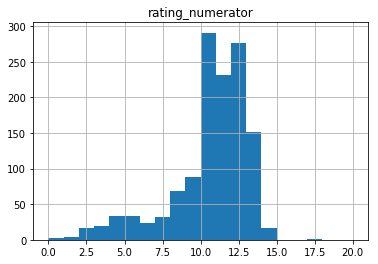

In [735]:
df_merged.hist(column='rating_numerator',bins=[0,1,2,3,4,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]);

The ratings given seems to behave in an unimodal behaviour with two peaks with a negative skew. One peak at 10 and one at 12. It seems that a lot of people rates their dogs lower than the denominator at 10, which isn't the actual purpose of the group. 

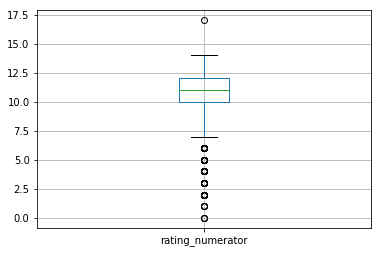

In [736]:
df_merged.boxplot(column='rating_numerator');

From the boxplot it seems that the rating numerator is normally distributed with some outliers.

The favorite count is looked in to:

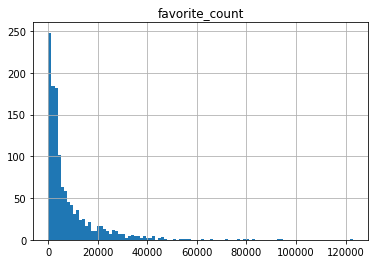

In [737]:
df_merged.hist(column='favorite_count',bins=100);

Most of the tweets seems to have relatively low favorite counts, but from the plot there seems to be a positive skew with a very long tail.

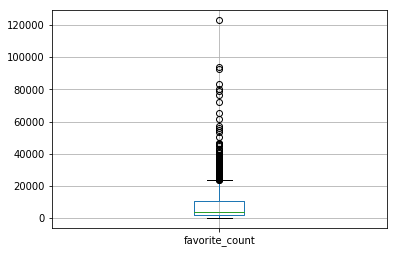

In [738]:
df_merged.boxplot(column='favorite_count');

The boxplot confirms what was seen in the previous plot.  
The retweet count is also investigated

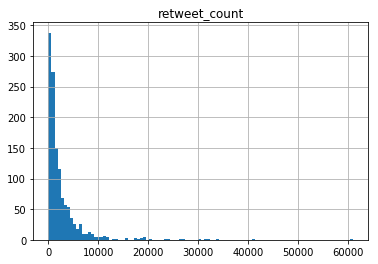

In [739]:
df_merged.hist(column='retweet_count',bins=100);

The retweet count shows the same tendency as the favorite count.

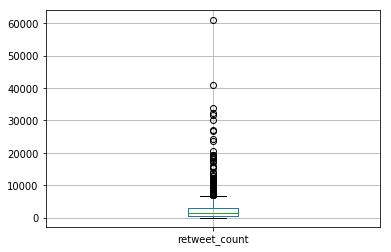

In [740]:
df_merged.boxplot(column='retweet_count');

Again showing the same trend as the favorite count. From this investigation it seems that the favorite and retweet count correlates well with each other. This possible correlation will be further investigated.

In [741]:
df_merged['retweet_count'].corr(df_merged['favorite_count'])

0.92277233620934085

There seems to be a well correlated relationship between the two parameters and this will be plotted

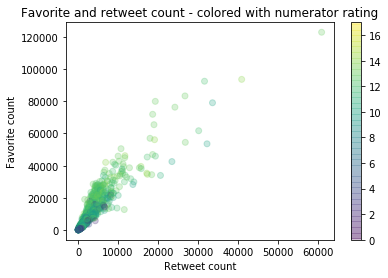

In [742]:
plt.scatter(df_merged['retweet_count'],df_merged['favorite_count'],c=df_merged['rating_numerator'], alpha=0.25,cmap = 'viridis')
plt.colorbar()
plt.xlabel("Retweet count")
plt.ylabel("Favorite count")
plt.title("Favorite and retweet count - colored with numerator rating")
plt.show()

There seems to be some tweets with a zero favorite count but with several retweets. Overall there is a positive trend between favorite and retweet count. Using the numerator rating as a color code it seems to indicate that high dog ratings are more prevalent for a high amount of retweets and favorites.  
There is a few tweets that have both a very high favorite and retweet count. The highest one will be further investigated.

In [743]:
df_merged.nlargest(1, 'favorite_count')

,tweet_id,timestamp,text,rating_numerator,rating_denominator,dog_nick,favorite_count,favorited,retweet_count,retweeted,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
228,807106840509214720,2016-12-09 06:17:20,This is Stephan. He just wants to help. 13/10 ...,13,10,,122923,0,61029,0,Chihuahua,0.50537,True,Pomeranian,0.120358,True,toy_terrier,0.077008,True


In [744]:
df_merged['text'].iloc[228]

'This is Stephan. He just wants to help. 13/10 such a good boy https://t.co/DkBYaCAg2d'

Following the url for the tweet reveals what looks to be a corgi who wants to help cleaning the floor. The machine learning predicts the following dog types and the confidence to that guess:

In [745]:
(df_merged['p1'].iloc[228], df_merged['p1_conf'].iloc[228],df_merged['p2'].iloc[228],df_merged['p2_conf'].iloc[228],df_merged['p3'].iloc[228],df_merged['p3_conf'].iloc[228])

('Chihuahua',
 0.50536999999999999,
 'Pomeranian',
 0.12035800000000001,
 'toy_terrier',
 0.077008099999999996)

In this case the algorithm seems to be off as the video shows a corgi. Let's look at the prediction with the three highest confidences in the machine learning dataset to investigate if the algorithm predicts correctly then. Only the predictions with p1_dog showing true will be investigated.

In [746]:
df_merged.nlargest(10, 'p1_conf').loc[df_merged['p1_dog'] == True]

,tweet_id,timestamp,text,rating_numerator,rating_denominator,dog_nick,favorite_count,favorited,retweet_count,retweeted,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1150,668636665813057536,2015-11-23 03:46:18,This is an Irish Rigatoni terrier named Berta....,10,10,,1083,0,510,0,komondor,0.999956,True,llama,0.000043,False,ram,2.160900e-07,False
602,709566166965075968,2016-03-15 02:25:31,This is Olaf. He's gotta be rare. Seems sturdy...,12,10,,3768,0,1319,0,chow,0.999837,True,Tibetan_mastiff,0.000117,True,Australian_terrier,1.133840e-05,True
201,814986499976527872,2016-12-31 00:08:17,This is Cooper. Someone attacked him with a sh...,11,10,pupper,8311,0,1450,0,dalmatian,0.999828,True,boxer,0.000068,True,American_Staffordshire_terrier,3.424360e-05,True


The p1 predictions for these three tweets are listed

In [747]:
(df_merged['p1'].iloc[1150], df_merged['p1_conf'].iloc[1150],df_merged['p1'].iloc[602],df_merged['p1_conf'].iloc[602],df_merged['p1'].iloc[201],df_merged['p1_conf'].iloc[201])

('komondor',
 0.99995599999999996,
 'chow',
 0.99983699999999998,
 'dalmatian',
 0.99982800000000005)

In [748]:
(df_merged['text'].iloc[1150],df_merged['text'].iloc[602],df_merged['text'].iloc[201])

('This is an Irish Rigatoni terrier named Berta. Completely made of rope. No eyes. Quite large. Loves to dance. 10/10 https://t.co/EM5fDykrJg',
 "This is Olaf. He's gotta be rare. Seems sturdy. Tail is floofy af. 12/10 would do whatever it takes to pet https://t.co/E9jaU59bh9",
 'This is Cooper. Someone attacked him with a sharpie. Poor pupper. 11/10 nifty tongue slip tho https://t.co/01vpuRDXQ8')

Even though the first tweet actually says Rigatoni terrier, then after reading the comments under the tweet it becomes evident that in fact it is a komondor, which the machine learning algorithm predicted.  
Tweet two is in fact a chow.  
Tweet three states that his pupper was attacked by a sharpie but he does not cheat the machine learning algorithm which correctly predicted a dalmatian.